In [1]:
import networkx as nx
import random
from random import choice
import pandas as pd
import copy
import time
import pickle

In [2]:
def save_list(graph_list,file_path='list_data.pkl'):
# Open the file in binary mode and write the list using pickle.dump()
    with open(file_path, 'wb') as file:
        pickle.dump(graph_list, file)
    print("List has been stored using pickle.")
def load_list(file_path='list_data.pkl'):
    # load data using pickle
    with open(file_path, 'rb') as file:
        loaded_list = pickle.load(file)
    return loaded_list

In [3]:
import matplotlib.pyplot as plt
def show_graph(G,weighted=False):
    options = {
        'node_color': 'lightblue',
        'node_size': 100,
        'width': 3,
    }
    if weighted:
        pos = nx.spring_layout(G)
        weights = nx.get_node_attributes(G, 'weight')
        nx.draw(G,pos,with_labels=True,**options)
        label_pos = {k: (v[0], v[1] + 0.08) for k, v in pos.items()}  # Adjust the label position here
        nx.draw_networkx_labels(G,label_pos, labels=weights,horizontalalignment='left')
        plt.show()
    else:
        nx.draw(G,**options)
        plt.show()
        

    
      

In [8]:
def generate_chordal(n):
    '''
    generate chordal graph with n vertices 
    by construct simplicial elimination order randomly 
    '''
    G=nx.Graph()
    seq=[i for i in range(n)]
    G.add_nodes_from(seq)
    for i in seq:
        #number of forward vertex
        f_n=n-i-1
        #connect k forward vertex
        k=random.randint(0,f_n)
        #list of forward vertex
        f_w=random.sample(seq[i+1:],k)
        #neighbor vertex
        w=list(G.neighbors(i))
        #existing forward vertex
        exist_f=[j for j in w if j >i]
        #current vertex + existing forward vertex + random picked vertex
        f_w_c=[i]+f_w+exist_f
        f_w_c=list(set(f_w_c))
        #add edges
        H=nx.complete_graph(f_w_c)
        G.add_edges_from(H.edges)
    return G
# generate a chordal graph
# for i in range(1):
#     G=generate_chordal(10)
#     if not nx.is_chordal(G):
#         print(nx.is_chordal(G))
        # P=G
        # break


In [4]:
# G=nx.complete_graph(5)
# G=nx.path_graph(5)
def least_index(main_set,sub_set):
    for n in main_set:
        if n in sub_set:
            return n
# def LexBFS(G_ori):
#     G=copy.deepcopy(G_ori)
#     #fixed S.E.O
#     R=[]
#     #label queue
#     S=[[]]
#     #init state 0
#     S[0]=list(G.nodes())
#     while True:
#         #pick vertex v from right most
#         v=choice(S[-1])
#         # print("v",v)
#         S[-1].remove(v)
#         R.append(v)
#         #pick all neighbors
#         w=list(G.neighbors(v))
#         G.remove_node(v)
#         # print("w",w)
#         length=len(S)
#         for i in range(length-1,-1,-1):
            
#             #update label
#             inter=set(S[i]).intersection(set(w))
#             if list(inter):
#                 #if intersect, delete old vertex and insert new set
#                 S[i]=list(set(S[i]).difference(inter))
#                 S.insert(i+1,list(inter))
#             # print('S',S)
#         #delete empty set
#         S=[s for s in S if s!=[]]
#         # print(S)
#         if not S:
#             break
#     #return reverse
#     return R[::-1]





In [10]:
def LexBFS(G_ori):
    G=copy.deepcopy(G_ori)
    #fixed S.E.O
    R=[]
    #label queue
    S=[[]]
    #init state 0
    S[0]=list(G.nodes())
    while True:
        #pick vertex v from right most
        v=choice(S[-1])
        # print("v",v)
        S[-1].remove(v)
        R.append(v)
        #pick all neighbors
        w=list(G.neighbors(v))
        G.remove_node(v)
        # print("w",w)
        length=len(S)
        for i in range(length-1,-1,-1):
            
            #update label
            inter=set(S[i]).intersection(set(w))
            if list(inter):
                #if intersect, delete old vertex and insert new set
                S[i]=list(set(S[i]).difference(inter))
                S.insert(i+1,list(inter))
            # print('S',S)
        #delete empty set
        S=[s for s in S if s!=[]]
        # print(S)
        if not S:
            break
    #return reverse
    return R[::-1]

In [11]:
class lex_list(list):
    def __init__(self,A):
        self.A=A
    def __lt__(self,other):
        # <
        len_A=len(self.A)
        len_B=len(other.A)
        for i in range(min(len_A,len_B)):
            if self.A[i]<other.A[i]:
                return True
            if self.A[i]>other.A[i]:
                return False
        if len_A<len_B:
            return True
        return False
    def __gt__(self,other):
        # >
        len_A=len(self.A)
        len_B=len(other.A)
        for i in range(min(len_A,len_B)):
            if self.A[i]>other.A[i]:
                return True
            if self.A[i]<other.A[i]:
                return False  
        if len_A>len_B:
            return True
        return False
    def __eq__(self, other):
        return self.A==other.A
    def __str__(self):
        return self.A
    


In [330]:
# Test LexBFS
for i in range(50): 
    G=generate_chordal(30)
    seq=LexBFS(G)
    # seq=lex_bfs(G)
    stat=is_chordal_graph(G,seq)
    # stat=is_chordal_graph(G,[i for i in range(30)])
    if not stat:
        # show_graph(G,True)
        # print(seq)
        print(stat)

In [12]:
def is_chordal_graph(G,seq):
    # return True if G is chordal graph
    n=len(seq)
    A=dict.fromkeys(seq,[])
    for i in range(0,n):
        v=seq[i]
        w=list(G.neighbors(v))
        # get forward neighbour
        X=list(set(seq[i+1:]).intersection(set(w)))
        sorted(X)
        if X:
            u=least_index(seq,X)
            # concatenate X — {u} to A[u]
            X.remove(u)
            A[u]=list(set(A[u]+X))
        inter=list(set(A[v]).intersection(set(w)))
        if sorted(A[v])!=sorted(inter):
            if [x for x in A[v] if x>=v]==inter:
                continue
            print(v,A[v],inter)
            return False
    return True
# seq=[i for i in range(9)]
# is_chordal_graph(G,seq)         

In [13]:
def cliques(G,seq):
    # generate all the maximum cliques and return the chromatic number
    # For perfect graph chromatic(G)=w(G)
    chromatic=1
    Clique_set=[]
    S=dict.fromkeys(seq,-1)
    n=len(seq)
    for i in range(0,n):
        v=seq[i]
        # Find all neighbours
        w=list(G.neighbors(v))
        # get forward neighbours
        X=list(set(seq[i+1:]).intersection(set(w)))
        # length of forward neighbor
        n_x=len(X)
        if not w:
            Clique_set.append([v])
            # print(w)
        if not X:
            continue
        # get smallest vertex in intersect (The smallest index that is not a neighbour)
        u=least_index(seq[i+1:],X)
        # update weight of u with n_x-1 if its bigger than original weight 
        S[u]=max(S[u],n_x-1)
        if S[v]<n_x:
            # print vertex in stable set
            # print("vertex in stable set:",v)
            # print all the cliques 
            # (The biggest clique in this process is also the maximum clique by the properity of simplicial order)
            Clique_set.append([v]+X)
            # print("clique:",[v]+X)
            #max k and |X|+1
            chromatic=max(chromatic,n_x+1)
    # print(chromatic)
    return Clique_set,chromatic
        
# cliques(G,seq)


In [5]:
def is_clique(G):
    num_nodes = len(G.nodes)
    max_edges = num_nodes * (num_nodes - 1) / 2  # Maximum number of edges in a complete graph
    
    return len(G.edges) == max_edges

In [6]:
def is_hole(G):
    # O(n)
    # Check if G is a hole
    num_nodes = len(G.nodes)

    # A hole should have only one cycle and the cycle length should be equal to the number of nodes
    if len(G.edges) == num_nodes and all(len(G[node]) == 2 for node in G.nodes):
        return True

    return False


In [87]:
G=nx.Graph()
nx.add_cycle(G,[1,2,3,4])
G.add_edge(4,5)
is_hole(G)

False

In [7]:
def simp_node(G):
    # return the first simplicial node found in G
    for node in G.nodes():
        neighbors = set(G.neighbors(node))
        # print(node)
        # print(neighbors)
        # print([(u,v) for u in neighbors for v in neighbors if u != node and v != node and u!=v])
        if all(G.has_edge(u, v) for u in neighbors for v in neighbors if u != node and v != node and u!=v):
            return True,node
            # print(f"Node {node} is simplicial.")
    return False,-1

In [8]:
def simp_hole(G):
    # for every edge
    G_edge_sets=G.edges()
    G_cp=copy.deepcopy(G)
    for edge in G_edge_sets:
        G_cp.remove_nodes_from(edge)
        # print('edge_picked:',edge)
        # print('node_removed:',G_cp.nodes())
        # if edge disconnect G
        if not nx.is_connected(G_cp):
            # check hole
            for comp in list(nx.connected_components(G_cp)):
                # add edge to component
                comp_uv=comp.union(edge)
                # print('comp+uv:',comp_uv)
                # create subgraph
                G_sub=G.subgraph(comp_uv)
                # if sub graph is a hole
                if is_hole(G_sub):
                    # return True and G with simp_hole removed
                    G.remove_nodes_from(comp)
                    return True, G
        # else get the original graph back
        # get all the missing edges
        G_cp_edge_sets=G_cp.edges()
        restore_edges=set(G_edge_sets)-set(G_cp_edge_sets)
        # add the edge back
        G_cp.add_nodes_from(edge)
        G_cp.add_edges_from(restore_edges)
    # return False,G
    return False,G

In [9]:
def simp_hole_v2(G):
    # for every edge
    G_edge_sets=G.edges()
    G_cp=G.copy()
    for edge in G_edge_sets:
        G_cp.remove_nodes_from(edge)
        # print('edge_picked:',edge)
        # print('node_removed:',G_cp.nodes())
        # if edge disconnect G
        if not nx.is_connected(G_cp):
            # check hole
            for comp in list(nx.connected_components(G_cp)):
                # add edge to component
                comp_uv=comp.union(edge)
                # print('comp+uv:',comp_uv)
                # create subgraph
                G_sub=copy.deepcopy(G.subgraph(comp_uv))
                # if sub graph is a hole
                if is_hole(G_sub):
                    # return True, G, G with simp_hole removed and edge set
                    # show_graph(G_sub)
                    G.remove_nodes_from(comp)
                    return True, G, G_sub,set(edge)
        # else get the original graph back
        # get all the missing edges
        G_cp_edge_sets=G_cp.edges()
        restore_edges=set(G_edge_sets)-set(G_cp_edge_sets)
        # add the edge back
        G_cp.add_nodes_from(edge)
        G_cp.add_edges_from(restore_edges)
    # return False,G,G and edge set
    return False,G,G,set(edge)

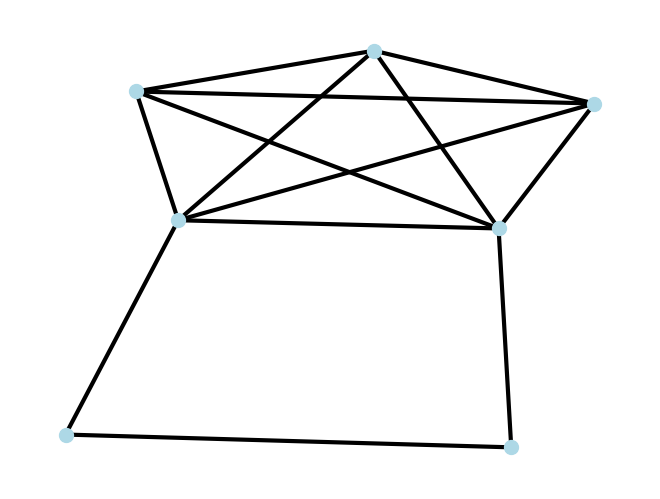

In [10]:
# Build Test graph
# complete graph with a simplicial hole
G=nx.complete_graph(5)
nx.add_cycle(G,[3,4,5,6])
show_graph(G)

In [10]:
# from treelib import Tree,Node
# tree=Tree()
class Node():
    def __init__(self,data,parent=None,left=None,right=None,cutset=None):
        self.parent=parent
        self.left=left
        self.right=right
        self.data=data
        self.cutset=cutset


In [11]:
def is_us_graph(G_ori):
    G=copy.deepcopy(G_ori)
    # if G is universal signable graph return True
    while(1):
        # stage: 1
        # if G is a clique or a hole, return True 
        if is_clique(G) or is_hole(G):
            return True
        # stage: 2
        # find the first simplicial node
        stat,node=simp_node(G)
        if stat:
            # if exist, remove node, return to stage 1 
            G.remove_node(node)
            continue
        # stage: 3
        # find a simplicial hole 
        # remove hole but keep u,v(connect vertex) in G
        # otherwise return G unchanged
        stat,G=simp_hole(G)
        if stat:
            continue
        return False

In [16]:
# G=nx.complete_graph(20)
is_us_graph(G)

NameError: name 'G' is not defined

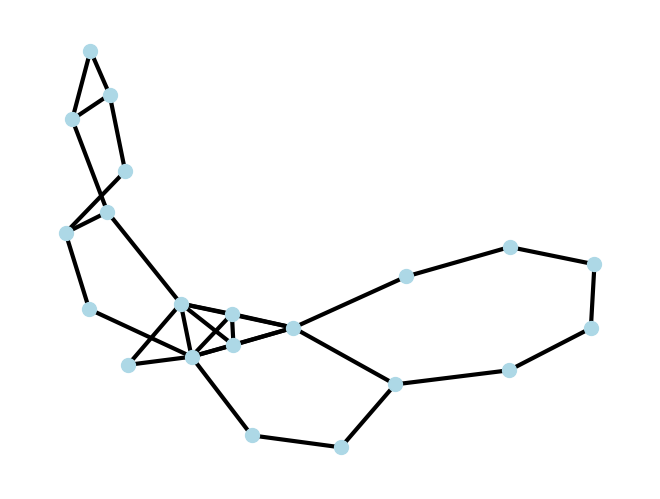

True

In [12]:
def generate_us_graph(level=10,maximum_base_num=5,maximum_cycle_length=5):
    # generate us graph by combine basic graph together
    # random # of nodes for base
    base_num=random.randint(1, maximum_base_num)
    # print("base nodes:",base_num)
    # Step 1: random base
    if base_num>1:
        base_parts = random.randint(0, 1)
    else:
        base_parts=0
    # print(base_parts)
    
    if base_parts==0:
        G=nx.complete_graph(base_num)
    elif base_parts==1:
        G=nx.cycle_graph(base_num)
    idx=base_num
    for _ in range(level):
        # clique or cycle
        if len(G.nodes)>=2:
            right_parts = random.randint(0, 4)
        else:
            right_parts=0
        # each step: pick 1 vertex
        v=random.choice(list(G.nodes))
        # step 2: add random right leaf
        if right_parts==0:
            # case 1: complete graph
            # Find cliques including vertex v
            cliques = [clique for clique in nx.find_cliques(G) if v in clique]
            choose_clique=random.choice(cliques)
            # print("clique_chosen",choose_clique)
            connected_vertex_list=list(choose_clique)
            # print("idx",idx)
            # print("vertex_list",connected_vertex_list)
            # print("G_nodes",G.nodes)
            G.add_node(idx)
            edges=[(idx,u) for u in connected_vertex_list]
            G.add_edges_from(edges)
            idx+=1
        elif right_parts!=0:
            # case 2: cycle
            # get 1 neighbour u of v
            u=random.choice(list(G.neighbors(v)))
            # generate random cycle length between 1 to maximum_cycle_length
            cycle_length=random.randint(1, maximum_cycle_length)
            # print(cycle_length)
            # add a cycle with length cycle_length+2
            node_list=[u,v]+[idx+i for i in range(cycle_length)]
            idx+=cycle_length
            nx.add_cycle(G,node_list)
    return G
G=generate_us_graph(6)
show_graph(G)
is_us_graph(G)

In [13]:
def us_graph_tree(G_ori):
    # if G is universal signable graph 
    # return True and decomposition tree
    # build decomposition tree (simplicial vertex first) 
    G=copy.deepcopy(G_ori)
    # add weights 1 on all vertex
    weights = 1
    nx.set_node_attributes(G,weights,'weight')
    # The first node is the whole graph
    head=Node(G.copy())
    pointer=head
    while(1):
        # stage: 1
        # if G is a clique or a hole, return True 
        # everything should be in the tree, test only at this stage
        if is_clique(G) or is_hole(G):
            return True,head
        # stage: 2
        # find the first simplicial node
        stat,node=simp_node(G)
        if stat:
            # if exist
            # store cutset vertex
            cutset_vertex=set(G.neighbors(node))
            cutset=copy.deepcopy(cutset_vertex)
            # new right child
            cutset.add(node)
            # print(cutset)
            # print(cutset_vertex)
            G_r=copy.deepcopy(G.subgraph(cutset))
            # print(G_r.nodes())
            # create right node
            Node_r=Node(G_r,pointer,cutset=cutset_vertex)
            # remove node, return to stage 1
            G.remove_node(node) 
            # new left child
            G_l=G.copy()
            # create left node
            Node_l=Node(G_l,pointer,cutset=cutset_vertex)
            # add Node to current pointer
            pointer.left=Node_l
            pointer.right=Node_r
            # pointer to the left
            pointer=pointer.left
            continue
        # stage: 3
        # find a simplicial hole 
        # remove hole but keep u,v(connect vertex) in G
        # otherwise return G unchanged
        stat,G,G_sub,cutset_vertex=simp_hole_v2(G)
        if stat:
            # print("G_sub")
            # print(cutset_vertex)
            # show_graph(G_sub,True)
            Node_l=Node(G,pointer,cutset=cutset_vertex)
            Node_r=Node(G_sub,pointer,cutset=cutset_vertex)
            pointer.left=Node_l
            pointer.right=Node_r
            # pointer to the left
            pointer=pointer.left
            continue
        return False,head

In [27]:
def us_graph_tree_v2(G_ori):
    # if G is universal signable graph 
    # return True and decomposition tree
    # build decomposition tree(simplicial hole first)
    G=copy.deepcopy(G_ori)
    # add weights 1 on all vertex
    weights = 1
    nx.set_node_attributes(G,weights,'weight')
    # The first node is the whole graph
    head=Node(G.copy())
    pointer=head
    while(1):
        # stage: 1
        # if G is a clique or a hole, return True 
        # everything should be in the tree, test only at this stage
        if is_clique(G) or is_hole(G):
            return True,head
        # stage: 3
        # find a simplicial hole 
        # remove hole but keep u,v(connect vertex) in G
        # otherwise return G unchanged
        stat,G,G_sub,cutset_vertex=simp_hole_v2(G)
        if stat:
            # print("G_sub")
            # print(cutset_vertex)
            # show_graph(G_sub,True)
            Node_l=Node(G,pointer,cutset=cutset_vertex)
            Node_r=Node(G_sub,pointer,cutset=cutset_vertex)
            pointer.left=Node_l
            pointer.right=Node_r
            # pointer to the left
            pointer=pointer.left
            continue
        # stage: 2
        # find the first simplicial node
        stat,node=simp_node(G)
        if stat:
            # if exist
            # store cutset vertex
            cutset_vertex=set(G.neighbors(node))
            cutset=copy.deepcopy(cutset_vertex)
            # new right child
            cutset.add(node)
            # print(cutset)
            # print(cutset_vertex)
            G_r=copy.deepcopy(G.subgraph(cutset))
            # print(G_r.nodes())
            # create right node
            Node_r=Node(G_r,pointer,cutset=cutset_vertex)
            # remove node, return to stage 1
            G.remove_node(node) 
            # new left child
            G_l=G.copy()
            # create left node
            Node_l=Node(G_l,pointer,cutset=cutset_vertex)
            # add Node to current pointer
            pointer.left=Node_l
            pointer.right=Node_r
            # pointer to the left
            pointer=pointer.left
            continue
        
        return False,head

In [34]:
stat,head=us_graph_tree(G)

In [286]:
print(head.right.cutset)
show_graph(head.right.data)

AttributeError: 'NoneType' object has no attribute 'cutset'

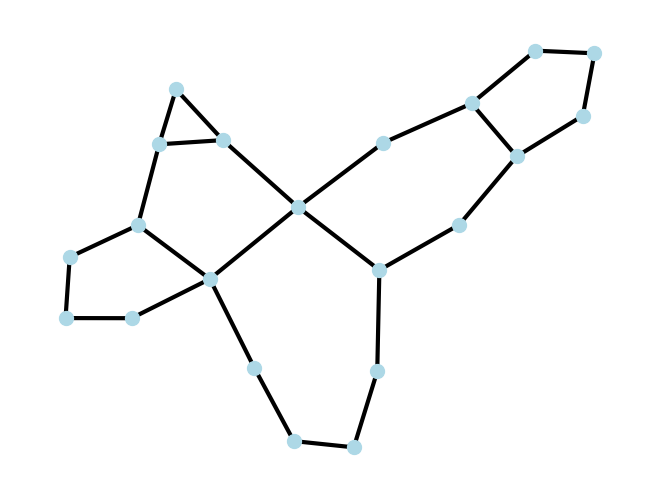

In [17]:
show_graph(G)

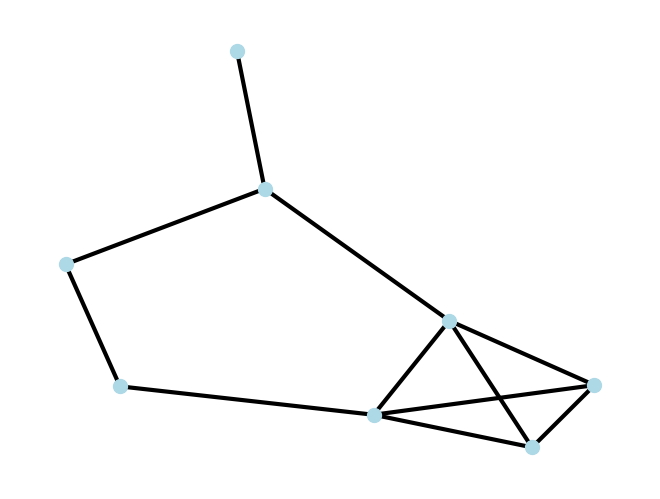

In [26]:
# Build Test graph on us graph
# complete graph with a simplicial hole
G=nx.complete_graph(4)
nx.add_cycle(G,[2,3,4,5,6])
G.add_edge(6,7)
show_graph(G)

In [30]:
stat,head=us_graph_tree(G)

In [17]:
def simple_x(G):
    # return the chromatic number of a basic graph (clique or hole)
    num_nodes=len(G.nodes())
    if is_clique(G):
        return num_nodes
    # if is_hole(G):
    else:
        # if even cycle
        if num_nodes%2==0:
            return 2
        # if odd cycle
        else:
            return 3
    # print("wrong child structure: child not a hole or clique!")
def simple_w(G):
    # return the maximum clique of a basic graph (clique or hole)
    num_nodes=len(G.nodes())
    if is_clique(G):
        return num_nodes
    # if is_hole(G):
    else:
        return 2
    # print("wrong child structure: child not a hole or clique!")

In [18]:
def us_graph_x_w(tree):
    # return the chormatic number and clique number
    # with an extreme decomposition tree of a us graph
    x=1
    w=1
    head=copy.deepcopy(tree)
    while(1):
        # search left tree
        if head.left!=None:
            # if some node does not have right tree
            # return wrong tree struct
            if head.right==None:
                print("wrong tree structure, missing right tree")
                return False,x,w
            # update x and w
            x=max(simple_x(head.right.data),x)
            w=max(simple_w(head.right.data),w)
            # moving pointer to the left
            head=head.left
            continue
        x=max(simple_x(head.data),x)
        w=max(simple_w(head.data),w)
        return True,x,w

In [213]:
stat,x,w=us_graph_x_w(head)

In [214]:
stat,x,w

(True, 6, 6)

In [19]:

def max_weighted_stable_set(G):
    # O(n)
    # for a graph G that is a cycle or path
    # using dynamic programming 
    # return the weight of stable set
    nodes=list(G.nodes)
    def get_idx(idx):
        return nodes[idx]
    
    n = len(G.nodes)
    
    # Create a list to store the maximum weights
    max_weights = [0]*(n+1)
    max_weights[1] = G.nodes[get_idx(0)]['weight']
    
    # Create a list to store the nodes in the maximum weighted stable set
    max_stable_set = [set(), {0}]
    
    for i in range(2, n + 1):
        max_weights[i] = max(max_weights[i - 1], max_weights[i - 2] + G.nodes[get_idx(i - 1)]['weight'])
        # print(max_weights[i])
        if max_weights[i] == max_weights[i - 1]:
            max_stable_set.append(max_stable_set[i - 1].copy())
        else:
            max_stable_set.append(max_stable_set[i - 2].union({i - 1}))
    
    # return max_stable_set[-1]
    return max(max_weights)

# # Example usage:
# # Create a path graph with weights
# path_graph = nx.path_graph(6)
# for node in path_graph.nodes:
#     path_graph.nodes[node]['weight'] = node

# # Compute the maximum weighted stable set
# stable_set = max_weighted_stable_set(path_graph)
# print("Maximum weighted stable set:", stable_set)


In [20]:
def simp_a(head,nodes):
    # if G is a simple hole or clique
    # return the weighted alpha
    G=head.data.subgraph(nodes).copy()
    if is_hole(G):
        # compute weighted alpha on a hole
        w=max_weighted_stable_set(G)
        return w
    elif is_clique(G):
        # compute weighted alpha on a clique 
        # which is maximum weight vertex
        w=0
        #return vertex with maximum weight
        for v in G.nodes():
            if w<G[v]["weight"]:
                w=G[v]["weight"]
        return w
    else:
        print("Not a simple leaf")
        return 0

In [21]:
def path_w_a(G,vertices):
    G_sub=G.subgraph(vertices).copy()
    w=max_weighted_stable_set(G_sub)
    return w

In [22]:
def cutset_weight(head,right):
    # This function take left and right child of a tree decomp
    # change the weight of each vertex in clique cutset
    # weighted function: For u in S w(u)=w'(u)+alpha[H(H-b\N-Hb(u))]-alpha[(H-b\S)]
    r_G=right.data.copy()
    # alpha of right part
    # alpha(H-b\S)
    a=0
    if is_clique(r_G):
        # O(1)
        # in us graph u would be one vertex
        u=list(set(r_G.nodes())-right.cutset)[0]
        # right w_alpha=weight of u
        a=head.data.nodes[u]["weight"]
        # if clique, for every v in cutset, w(v)=w'(v)+alpha[None]-w_alpha[v]=w'(v)-w_alpha[v]
        for v in right.cutset:
            # assign new weight to cutsets with -a(alpha of that one vertex)
            head.data.nodes[v]["weight"]-=a
    elif is_hole(r_G):
        # constant=2 *   
        # for every vertex in cutset
        # third part (hole delete its cutset) of the weighted function
        vertices_3=set(r_G)-set(right.cutset)
        a_3=path_w_a(head.data,vertices_3)
        a=a_3
        # cutset of 2 vertices
        for v in right.cutset:
            # second part (hole delete its cutset + some neighbour) of the weighted function
            vertices_2=set(r_G)-set(r_G.neighbors(v))-set([v])
            a_2=path_w_a(head.data,vertices_2)
            # assign new weight
            head.data.nodes[v]["weight"]=head.data.nodes[v]["weight"]+a_2-a_3
    # return weighted a of the right side (Hb\s)
    return a

In [24]:
def us_graph_a(tree):
    
    ground_a=0
    # moving head
    head=copy.deepcopy(tree)
    # base graph with weight all set to 1
    base_tree=copy.deepcopy(tree)
    while head.left:
        # search left, if head.left=None, then there is only one node left 
        # modify weight in clique cutset, return alpha of H-b\S
        right_a=cutset_weight(base_tree,head.right)
        # print(right_a)
        ground_a+=right_a
        # go to the next level
        head=head.left
    # reach the end of left child
    # print("alpha of all right node is: ", ground_a)
    final_a=simp_a(base_tree,head.data.nodes)
    # print("alpha of left end is: ", final_a)
    ground_a+=final_a
    show_graph(base_tree.data,weighted=True)
    return ground_a
   
    
   

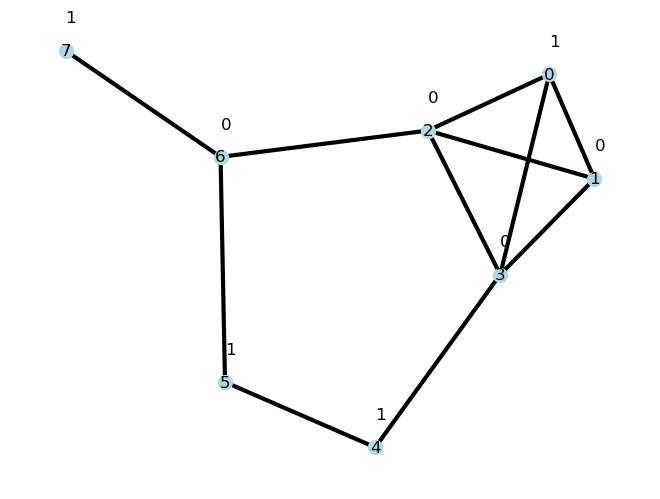

3


In [33]:

a=us_graph_a(head)
print(a)

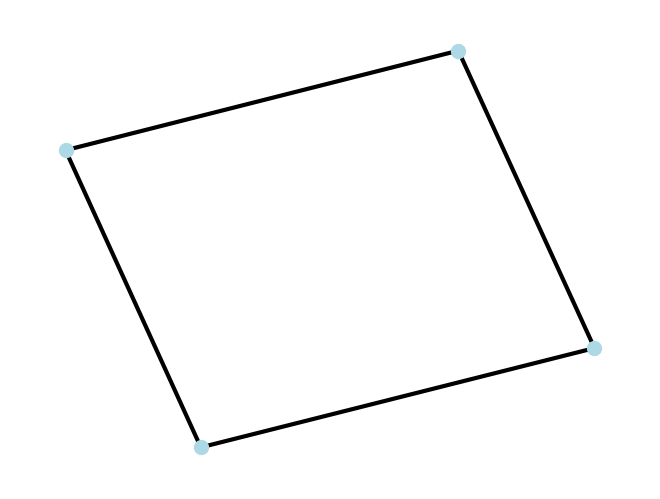

In [148]:
show_graph(head.left.left.left.data)

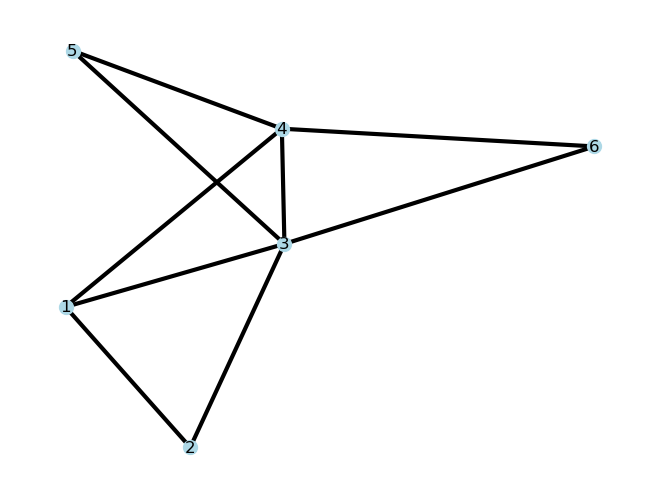

In [75]:
# build a test interval graph
G=nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4),(3,5),(4,5),(4,6),(3,6)])
show_graph(G,True)

In [79]:
seq=LexBFS(G)
seq


[2, 1, 6, 4, 3, 5]

In [80]:
is_chordal_graph(G,seq)

True

In [85]:
cliques(G,seq)

([[2, 1, 3], [1, 3, 4], [6, 3, 4], [4, 3, 5]], 3)

In [35]:
# Test
# generate chordal graph to test (50,100,200)nodes 5 each
number_of_graph=10
chordal_list=[]
T1 = time.time()
for i in [50,100,200]:
    chordal_list.append([generate_chordal(i) for _ in range(number_of_graph)])
save_list(chordal_list,'chordal_test.pkl')
T2 = time.time()
print('Generate chordal graphs took:%s ms' % ((T2 - T1)*1000))
us_list=[]
T1 = time.time()
for i in [20,50,100]:
    us_list.append([generate_us_graph(i) for _ in range(number_of_graph)])
save_list(us_list,'us_test.pkl')
T2 = time.time()
print('Generate us graphs took:%s ms' % ((T2 - T1)*1000))

List has been stored using pickle.
Generate chordal graphs took:37349.706411361694 ms
List has been stored using pickle.
Generate us graphs took:274.19567108154297 ms


In [65]:
# build DataFrame
chordal_df=pd.DataFrame(columns=['Nodes', 'Edges','LexBFS(ms)','cliques(ms)'])
us_df=pd.DataFrame(columns=['level','Nodes', 'Edges','Run_tree(ms)','Run_x_w(ms)','Run_a(ms)'])

In [66]:
# Test us graph
us_list=load_list("us_test.pkl")
levels = [20, 50, 100]
for node_set,curr_level in zip(us_list,levels):
    for us_i in node_set:
        tree_time=0
        x_w_time=0
        a_time=0
        # Timing Tree
        T1 = time.time()
        stat,head=us_graph_tree(us_i)
        T2 = time.time()
        tree_time=T2-T1
        # Timing w x
        head_cp=copy.deepcopy(head)
        T1 = time.time()
        us_graph_x_w(head_cp)
        T2 = time.time()
        x_w_time=T2-T1
        # Timing a
        head_cp=copy.deepcopy(head)
        T1 = time.time()
        us_graph_a(head_cp)
        T2 = time.time()
        a_time=T2-T1
        data_t={'level':curr_level,'Nodes':len(us_i.nodes()), 'Edges':len(us_i.edges()),
                'Run_tree(ms)':tree_time*1000,'Run_x_w(ms)':x_w_time*1000,'Run_a(ms)':a_time*1000}
        us_df = pd.concat([us_df, pd.DataFrame.from_records([data_t])], ignore_index=True)
        # us_df=us_df.append(data_t, ignore_index=True)
    print('group finished') 

group finished
group finished
group finished


In [67]:
us_df

,level,Nodes,Edges,Run_tree(ms),Run_x_w(ms),Run_a(ms)
0,20,58,80,67.639589,15.635490,33.518553
1,20,47,66,424.768686,13.850689,31.463623
2,20,42,63,54.421186,14.905930,28.318882
3,20,59,79,104.193687,15.259027,34.363747
4,20,52,79,53.491831,17.307520,47.329187
5,20,53,71,35.420895,13.458490,138.896227
6,20,53,71,92.730045,13.038635,31.512499
7,20,61,81,58.148623,18.464088,30.033350
8,20,48,67,36.889791,11.041641,25.029421
9,20,56,89,54.903030,19.925117,40.119410


In [94]:
# us_df['Run_a(ms)']=us_df['Run_a(ms)']*1000
save_list(us_df,'us_df.pkl')

List has been stored using pickle.


In [16]:
temp=[]
# Test chordal graph
chordal_list=load_list("chordal_test.pkl")
for node_set in chordal_list:
    for chordal_i in node_set:
        n=len(chordal_i.nodes())
        BFS_time=0
        cliques_time=0
        stable_time=0
        seq=[i for i in range(n)]
        T1 = time.time()
        LexBFS(chordal_i)
        T2 = time.time()
        BFS_time=T2-T1
        # Timing cliques
        T1 = time.time()
        cover,chor=cliques(chordal_i,seq)
        T2 = time.time()
        cliques_time=T2-T1
        temp.append((len(cover),chor))
        data_t={'Nodes':n, 'Edges':len(chordal_i.edges()),
                'LexBFS(ms)':BFS_time*1000,'cliques(ms)':cliques_time*1000}
        chordal_df = pd.concat([chordal_df, pd.DataFrame.from_records([data_t])], ignore_index=True)
        # chordal_df=chordal_df.append(data_t, ignore_index=True)
    print('group finished') 

group finished
group finished
group finished


In [17]:
# chordal_df=load_list("chordal_df.pkl")
chordal_df

,Nodes,Edges,LexBFS(ms),cliques(ms)
0,50,1212,5.735636,0.000000
1,50,1210,4.065037,1.001120
2,50,1131,4.999161,0.000000
3,50,1207,5.999565,0.999451
4,50,1036,2.998829,0.999689
5,50,1107,3.998995,0.000000
6,50,1213,3.995419,0.000000
7,50,1156,5.004644,0.000000
8,50,1212,4.001856,1.003742
9,50,1118,3.994465,0.000000


In [68]:
# df=chordal_df
df=us_df
def avg_df(df,str):
    # returns the average of each column in dateframe
    print(df[:10][str].mean())
    print(df[10:20][str].mean())
    print(df[20:30][str].mean())
avg_df(df,"Nodes")
avg_df(df,"Edges")
# avg_df(df,"LexBFS(ms)")
# avg_df(df,"cliques(ms)")
avg_df(df,"Run_tree(ms)")
avg_df(df,"Run_x_w(ms)")
avg_df(df,"Run_a(ms)")
		

52.9
129.8
268.0
74.6
180.8
373.7
98.2607364654541
651.1030197143555
5271.481347084045
15.288662910461426
87.95139789581299
335.20634174346924
44.05848979949951
186.58785820007324
610.1729869842529


In [147]:
save_list(chordal_df,'chordal_df.pkl')

List has been stored using pickle.


In [148]:
# Load DataFrame
chordal_df=load_list('chordal_df.pkl')
us_df=load_list('us_df.pkl')

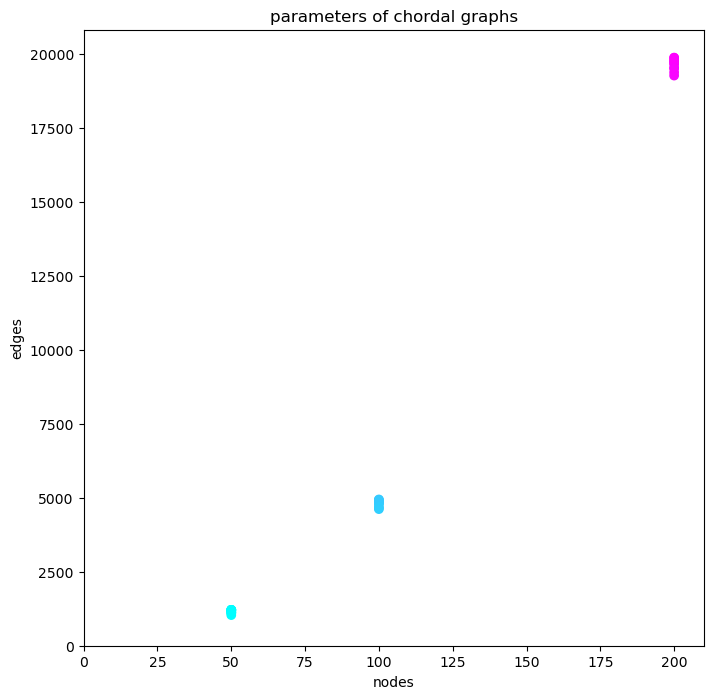

In [181]:
plt.figure(figsize=(8,8))
plt.scatter(list(chordal_df["Nodes"]),list(chordal_df["Edges"]),c=list(chordal_df["Edges"]),cmap='cool')
plt.ylim(0,)
plt.xlim(0,210)
plt.title('parameters of chordal graphs')
plt.ylabel('edges')
plt.xlabel('nodes')
plt.savefig("chordal_scatter.png")
plt.show()


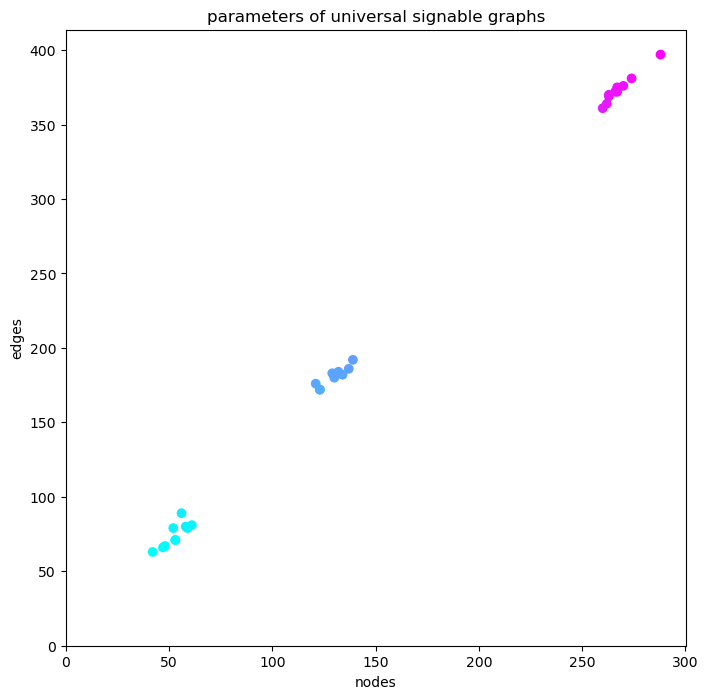

In [182]:
# plt.scatter(us_df["Nodes"][:10],us_df["Edges"][:10])
plt.figure(figsize=(8,8))
plt.scatter(list(us_df["Nodes"]),list(us_df["Edges"]),c=list(us_df["Edges"]),cmap='cool')
plt.ylim(0,)
plt.xlim(0,)
plt.title('parameters of universal signable graphs')
plt.ylabel('edges')
plt.xlabel('nodes')
plt.savefig("us_scatter.png")
plt.show()